# 인공신경 간단하게 실습 100 에포크 마다 산점도 시각화 실습

In [1]:
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt

In [2]:
# 인공신경망 모델 클래스 정의 
class SimpleNet(nn.Module) : 
    """
    이진 분류 문제 
    입력층 2개 , 은닉층 1개 (노드 5) 출력층 1개 (시그모이드 활성화 함수 사용)
    """
    def __init__(self) :
        super(SimpleNet, self).__init__() # 부모 클래스에 메서드 호출 하는 방법 입니다.
        self.fc1 = nn.Linear(2,5)
        self.fc2 = nn.Linear(5,1)
        pass
    
    def forward(self, x) :
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        
        return x

### 데이터 생성

In [3]:
x = torch.randn(100, 2)
y = ((x[:,0] > 0) & (x[:,1] > 0)).float()
print(x)
print(y)

tensor([[ 0.4908, -0.0390],
        [-0.3832,  0.1521],
        [ 1.7944,  0.6711],
        [-0.2975, -0.7331],
        [ 1.1271, -1.3352],
        [-1.6540,  0.9048],
        [-0.7247, -0.0541],
        [ 0.9508, -0.2947],
        [ 0.9266,  0.6674],
        [-0.4833,  0.1192],
        [-0.1920, -1.0376],
        [ 0.5869, -0.8303],
        [ 0.9125,  0.3638],
        [ 1.3989, -1.0299],
        [-0.3268, -0.3499],
        [-1.4281, -1.1311],
        [ 1.5631,  0.2403],
        [-0.8830,  0.1144],
        [ 0.1782, -1.1852],
        [ 0.2001, -0.7478],
        [ 0.2908, -0.0219],
        [-1.8667, -0.7540],
        [ 0.4279, -0.4625],
        [-0.7518,  0.1200],
        [ 1.0289,  0.9385],
        [ 0.1841, -1.9069],
        [-0.2207,  0.8401],
        [-0.2647,  0.5836],
        [ 1.0757,  1.3597],
        [-0.2605, -1.9623],
        [-0.8732,  0.4387],
        [-1.1110, -0.2192],
        [-0.6912, -2.6797],
        [-1.7309,  0.1679],
        [-0.6341, -0.5507],
        [-0.6370,  0

### 모델 선언

In [4]:
model = SimpleNet()
print(model)

SimpleNet(
  (fc1): Linear(in_features=2, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=1, bias=True)
)


### loss 함수랑 옵티마이저 정의

In [6]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

### 학습

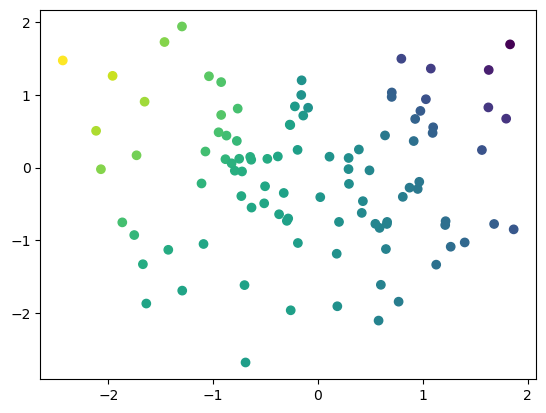

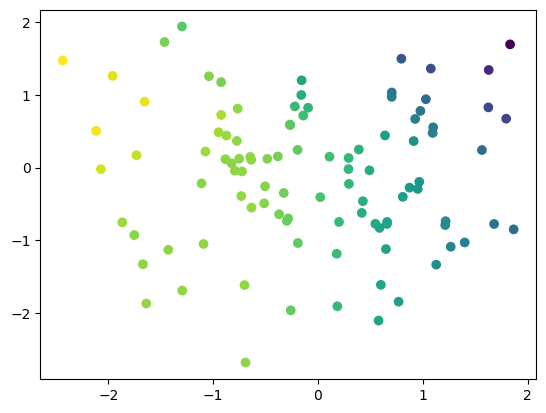

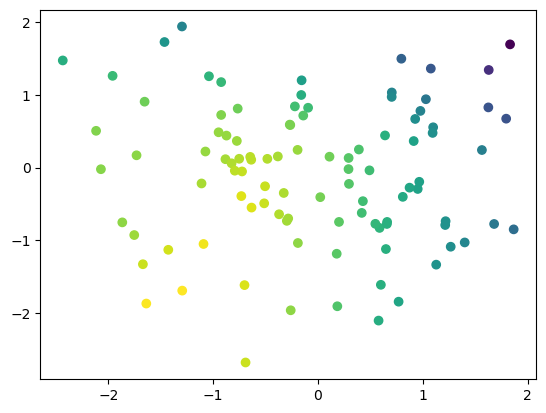

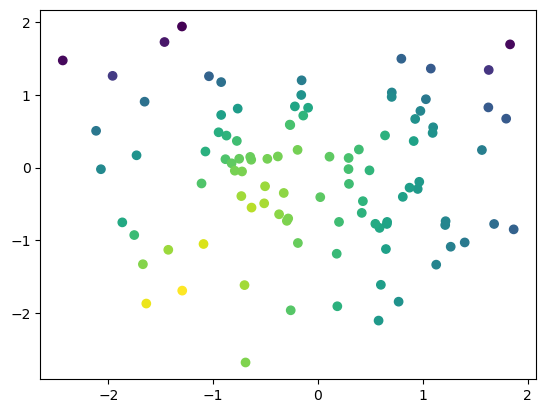

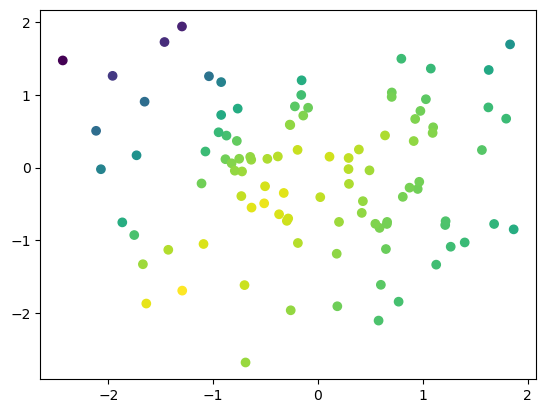

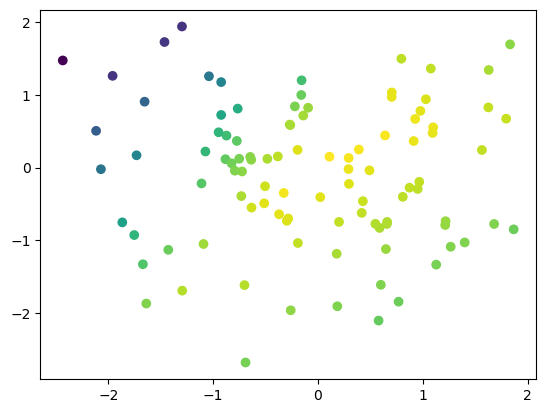

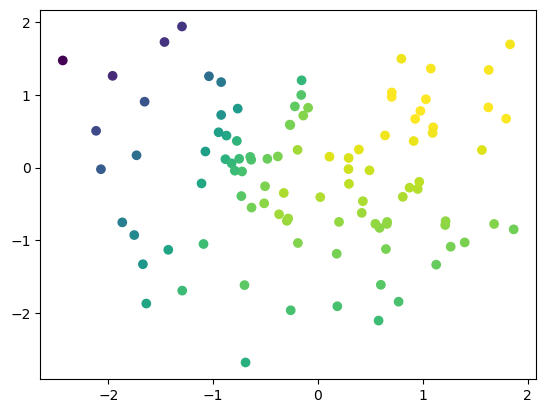

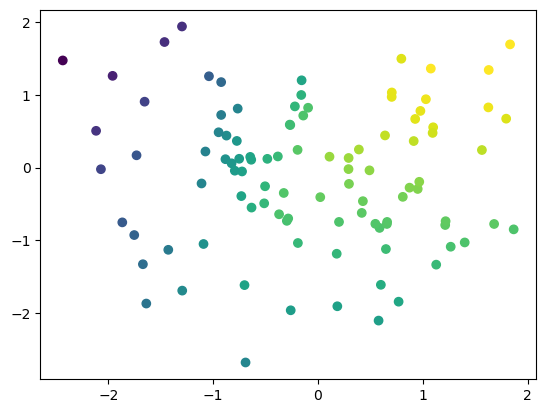

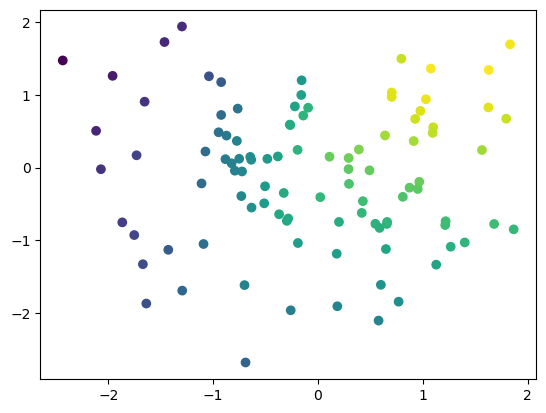

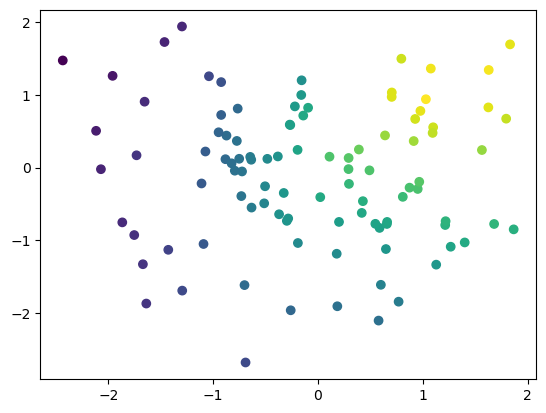

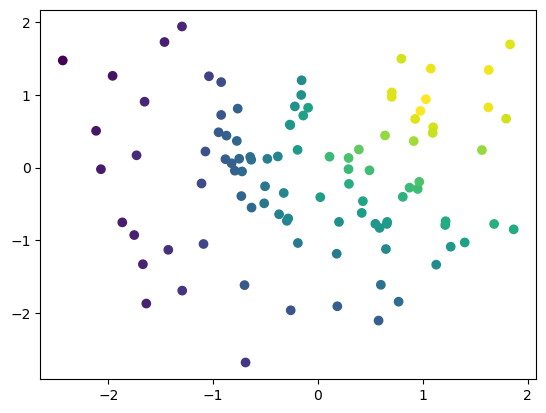

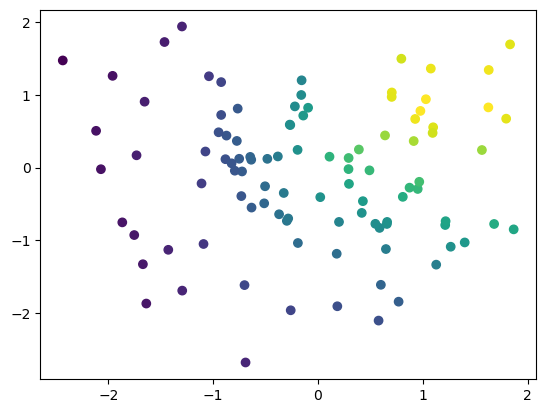

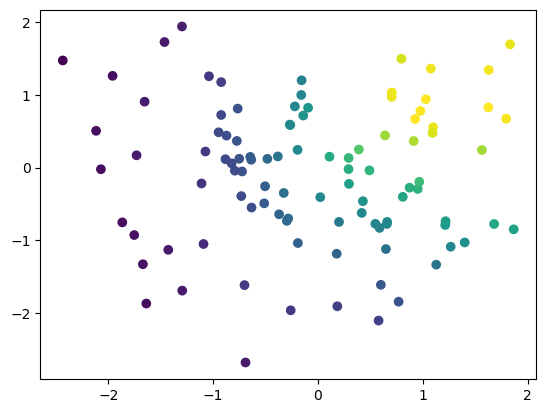

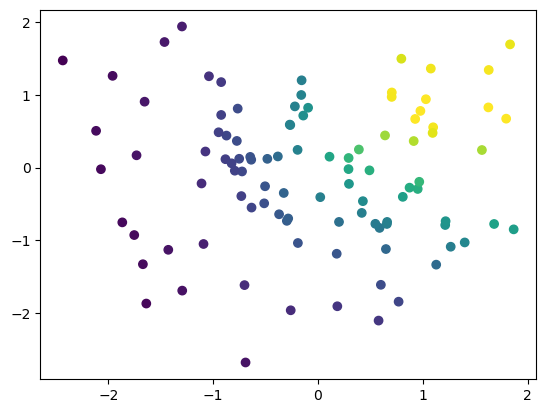

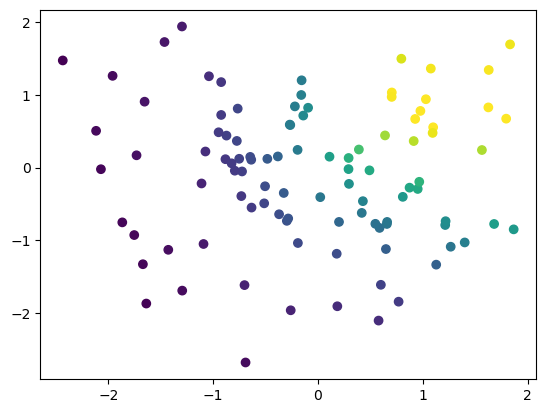

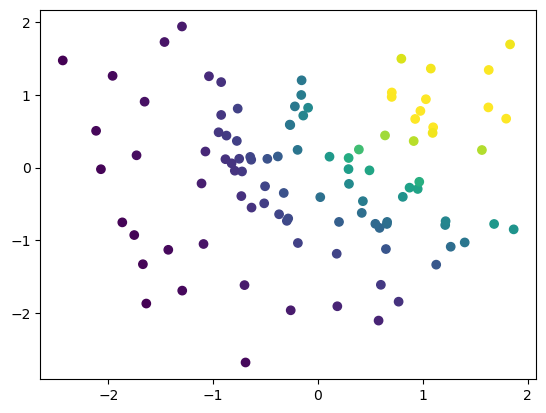

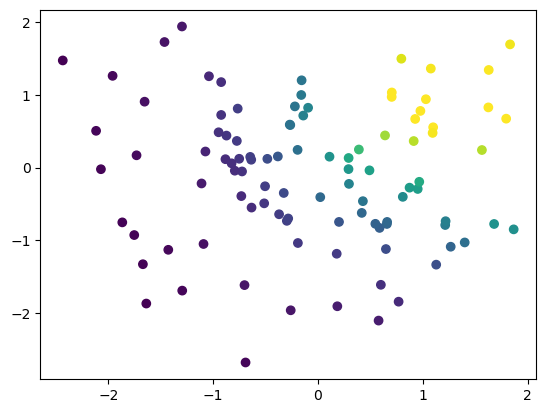

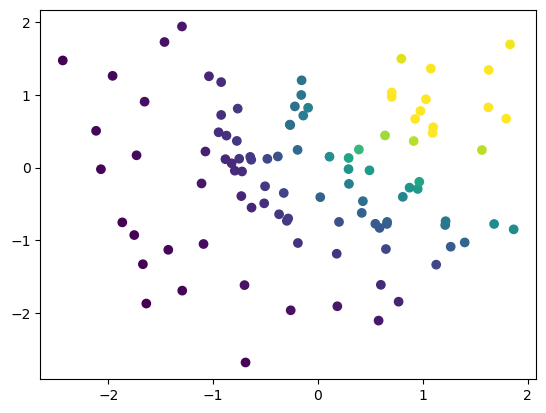

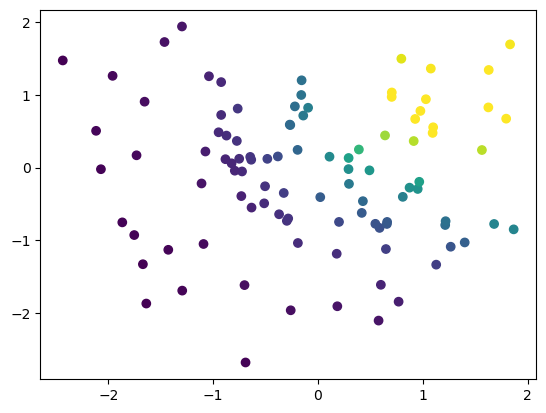

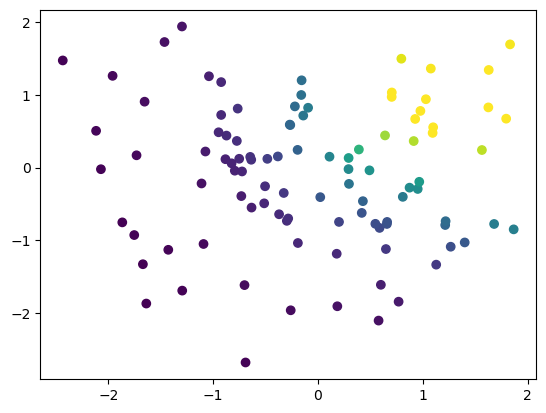

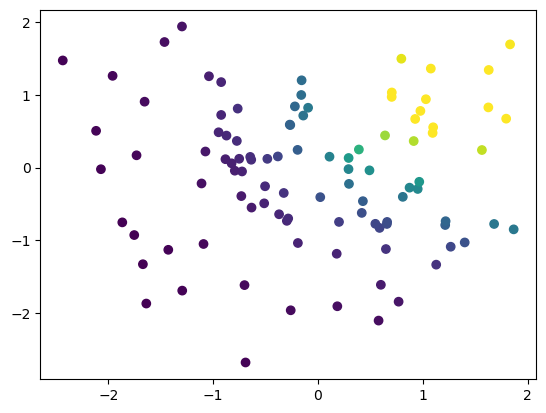

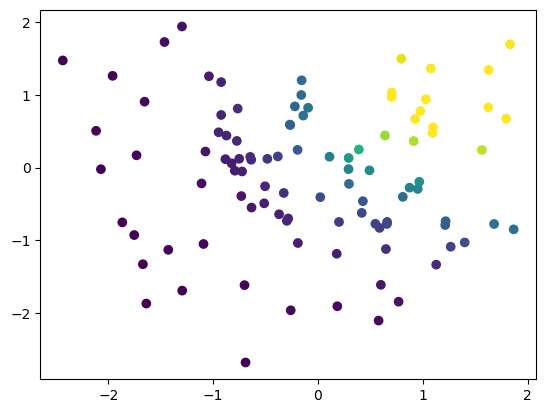

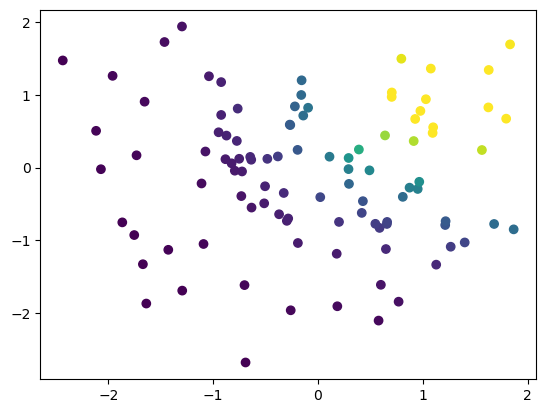

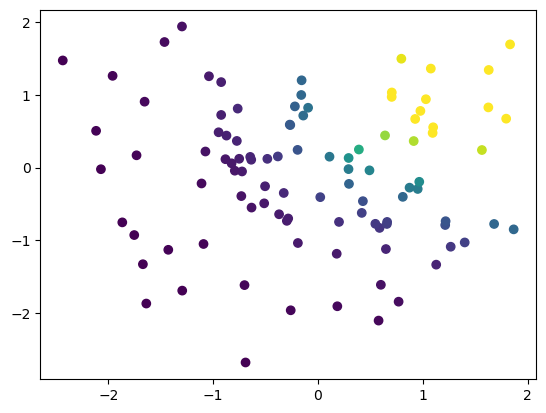

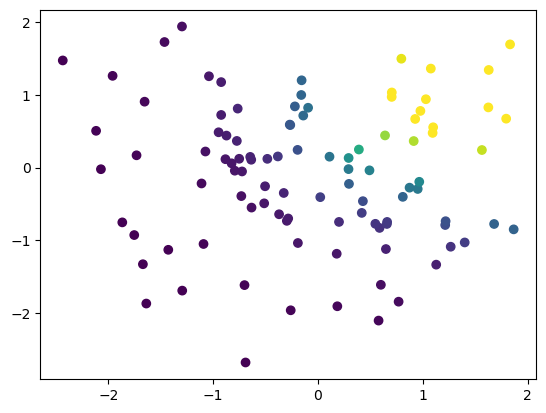

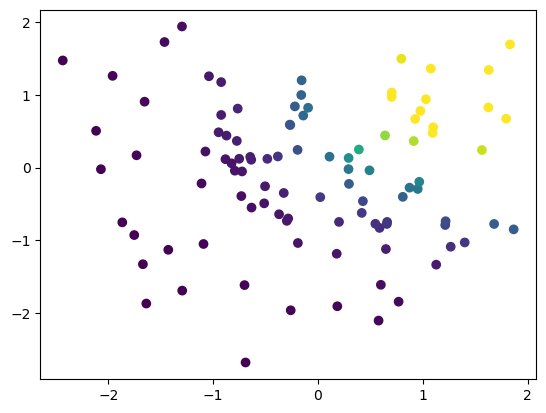

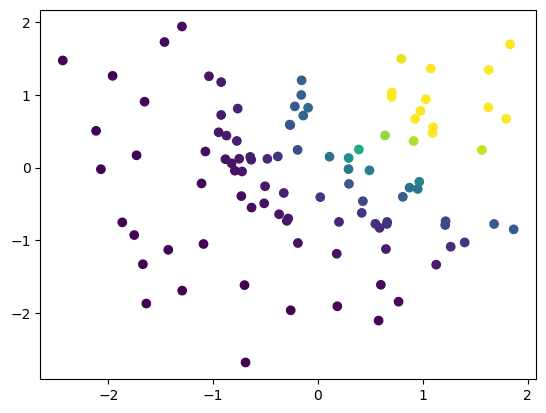

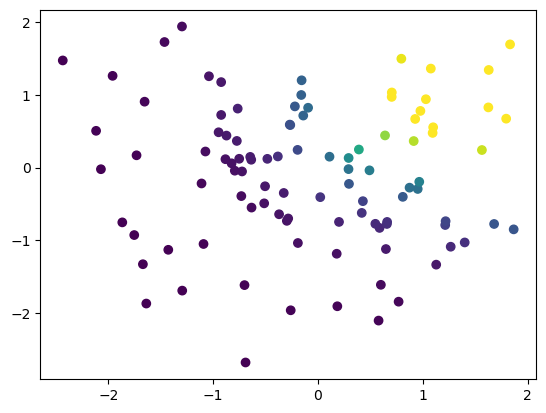

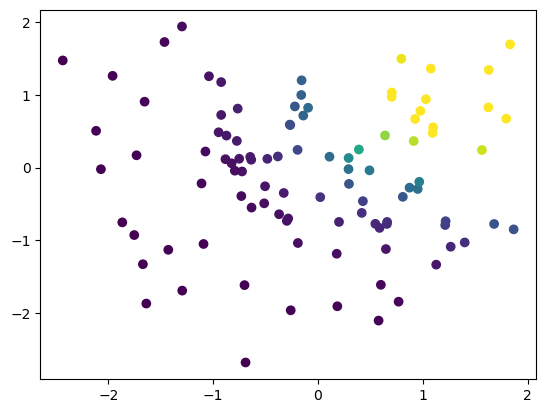

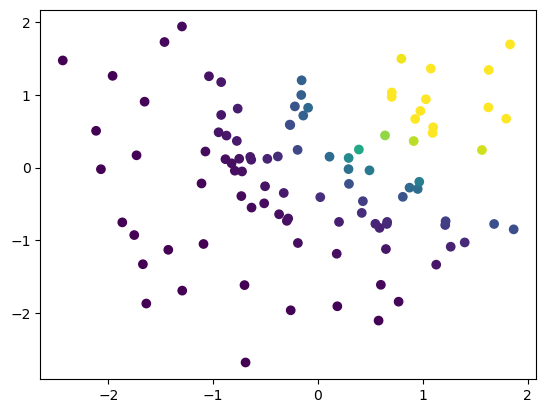

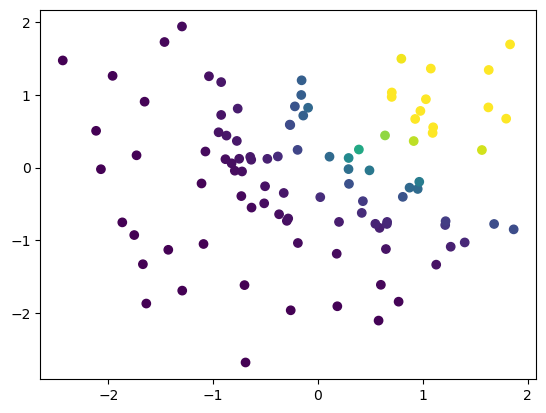

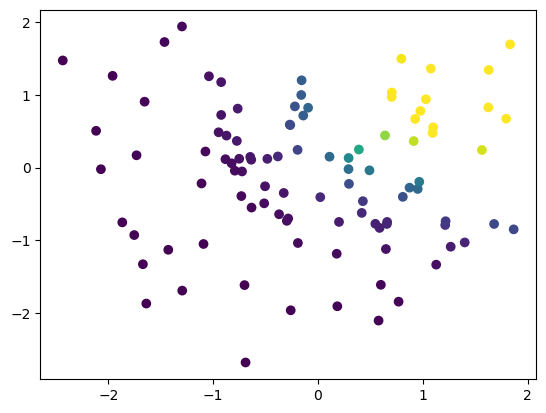

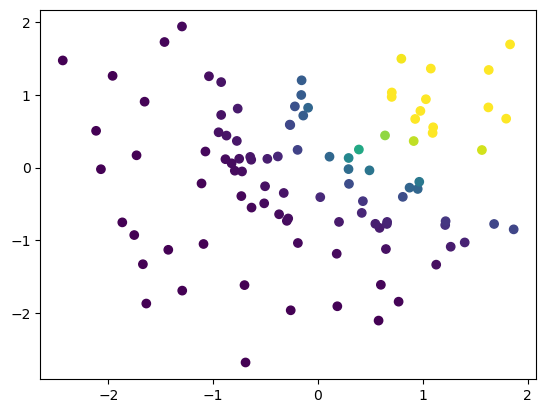

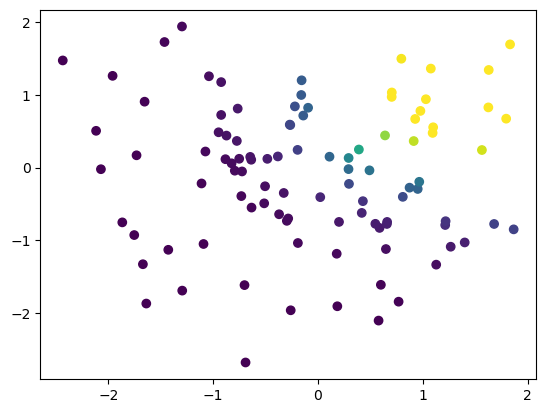

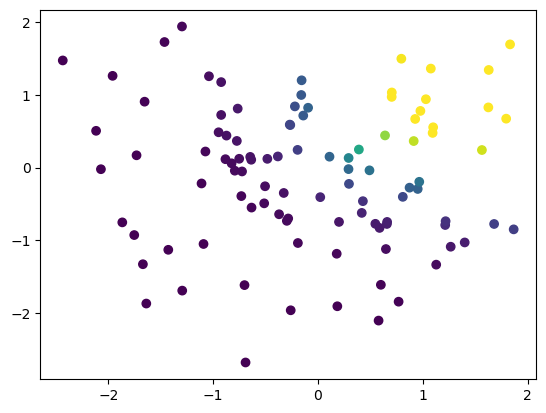

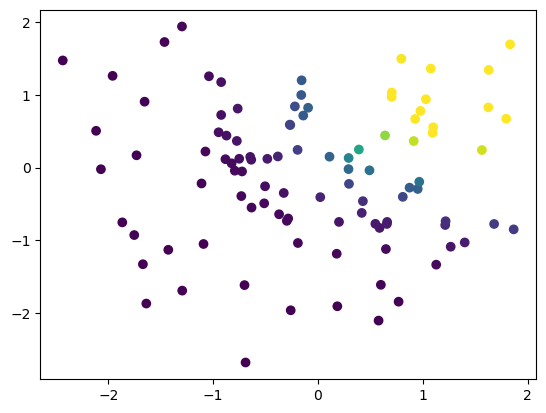

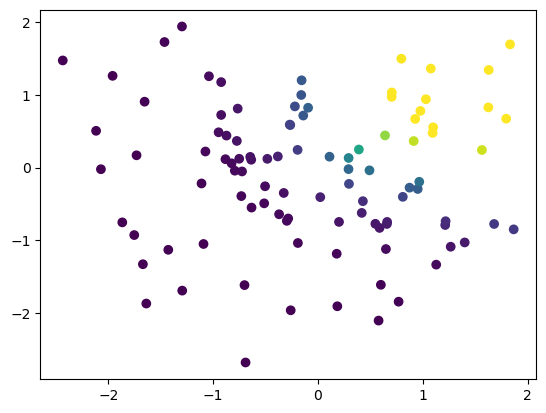

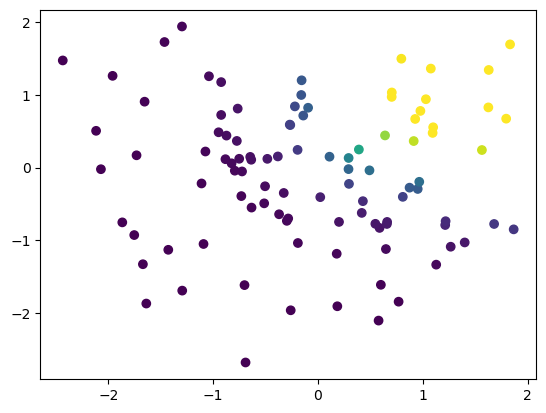

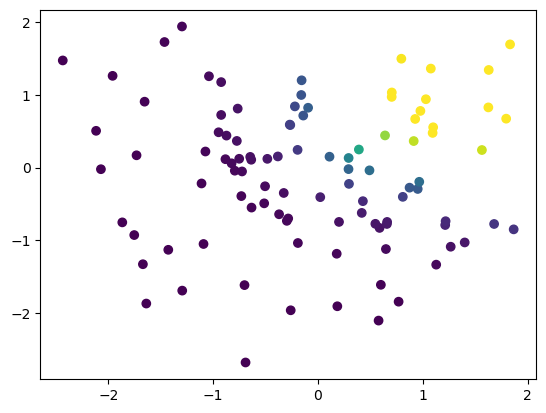

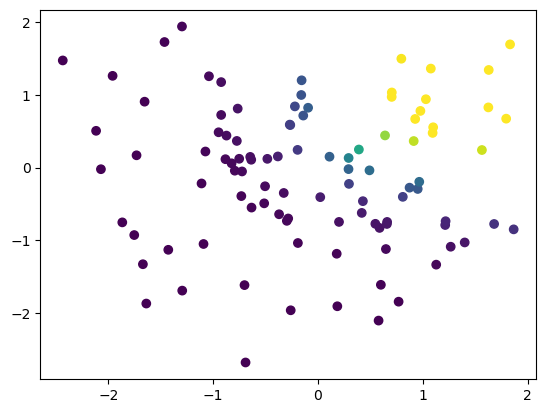

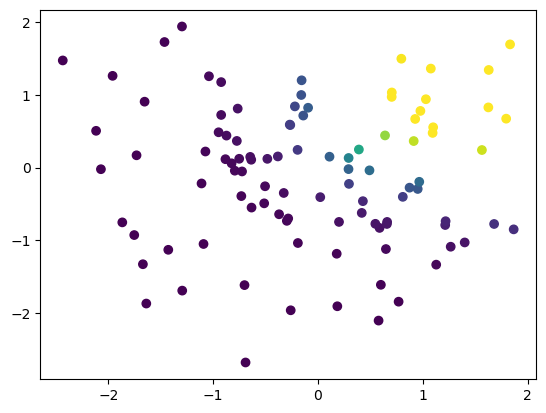

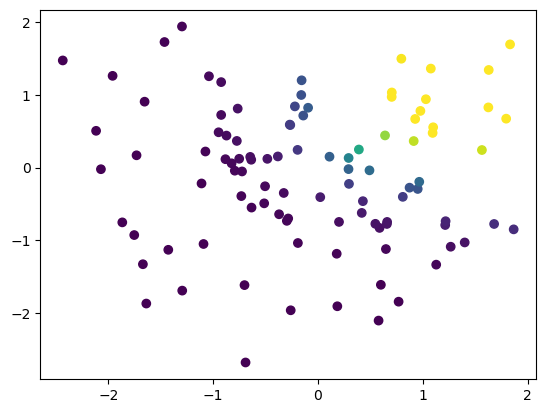

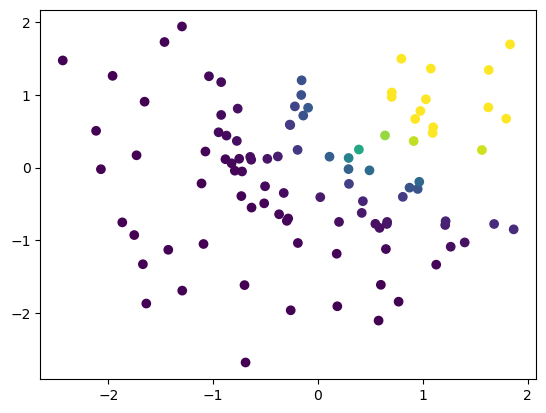

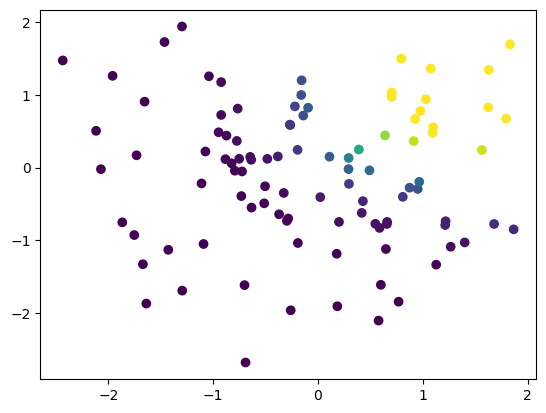

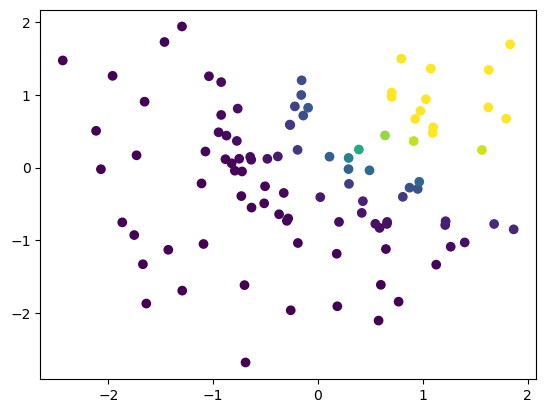

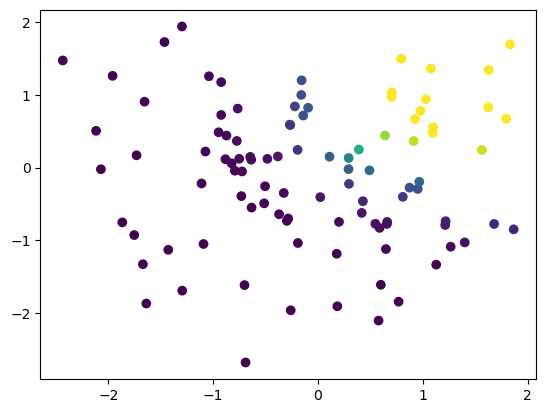

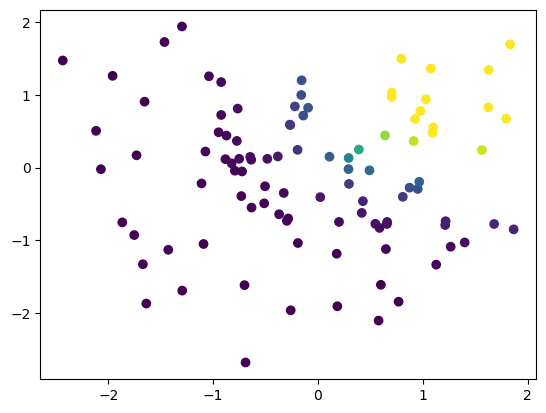

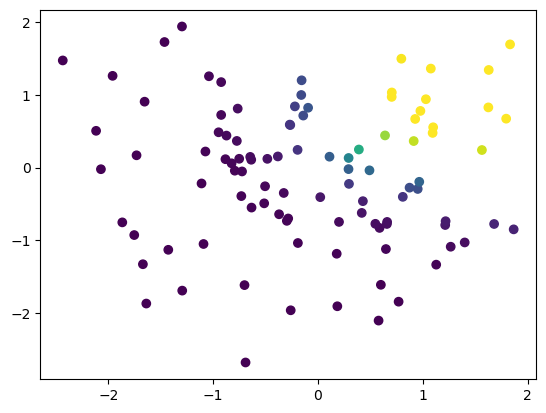

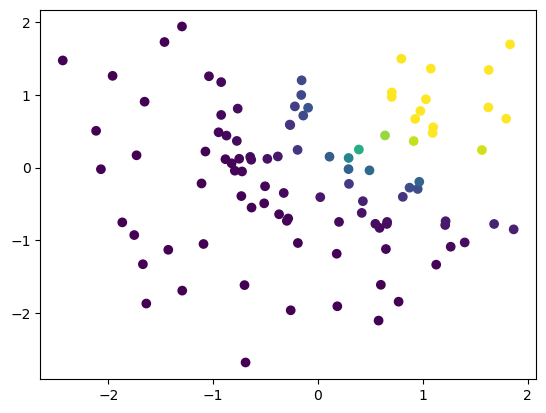

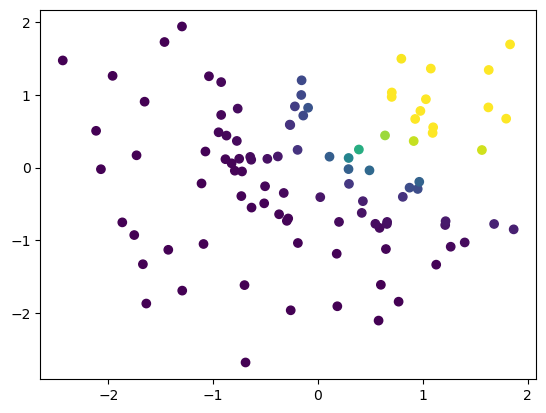

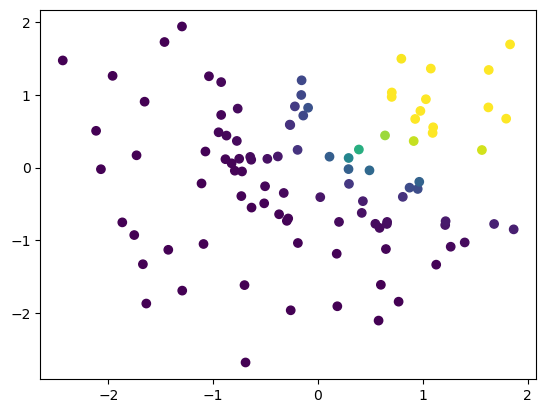

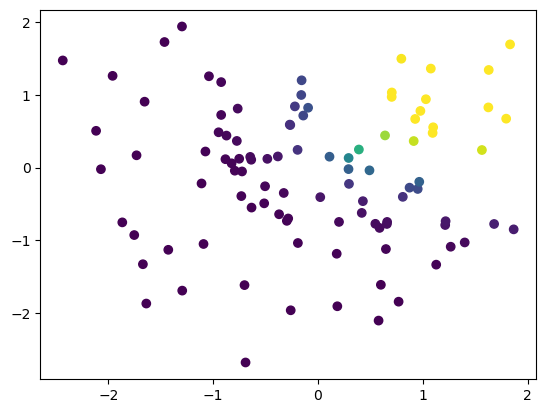

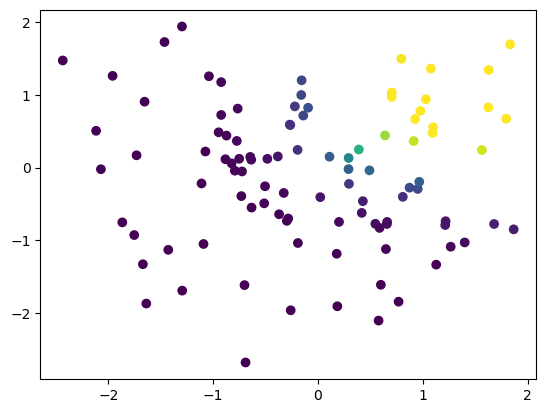

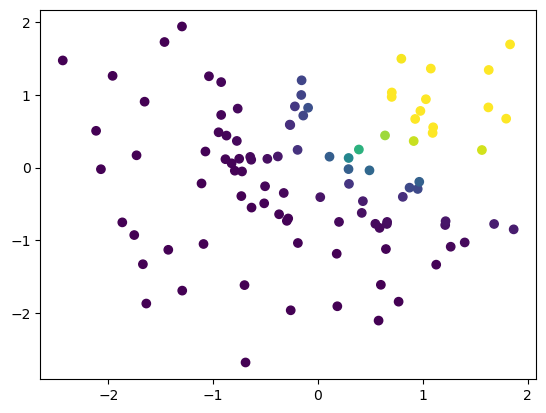

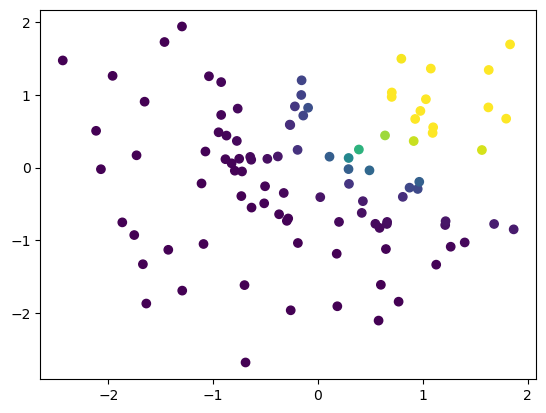

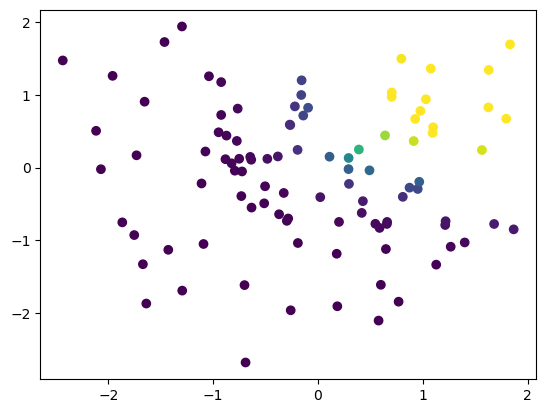

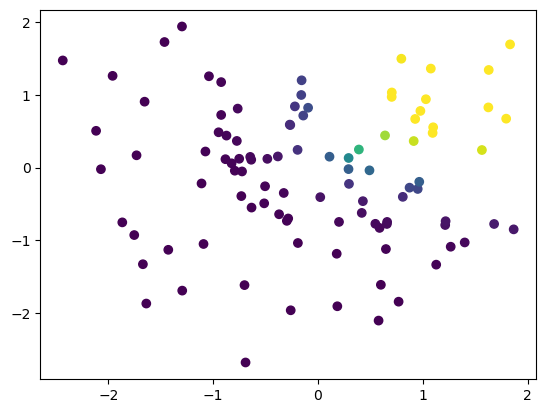

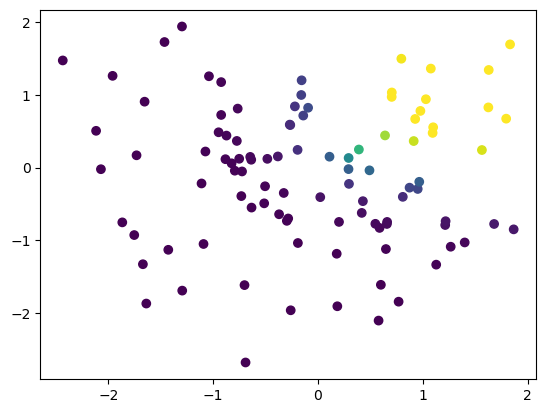

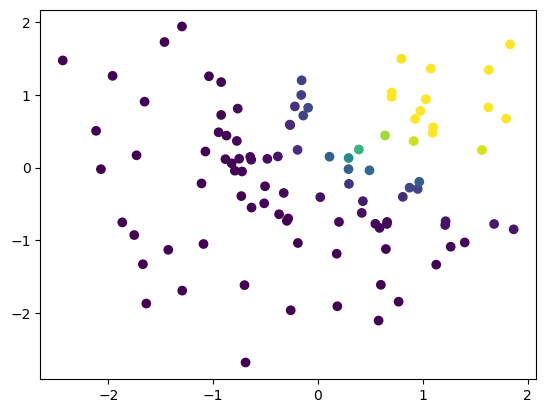

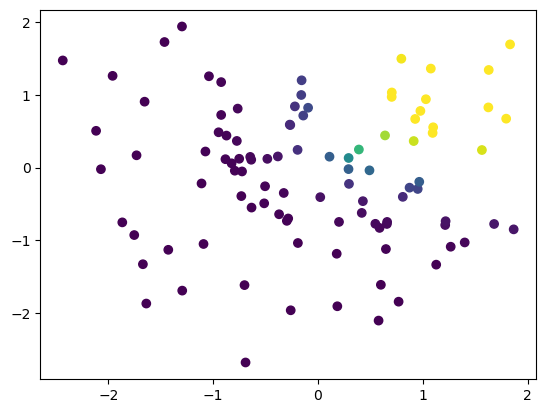

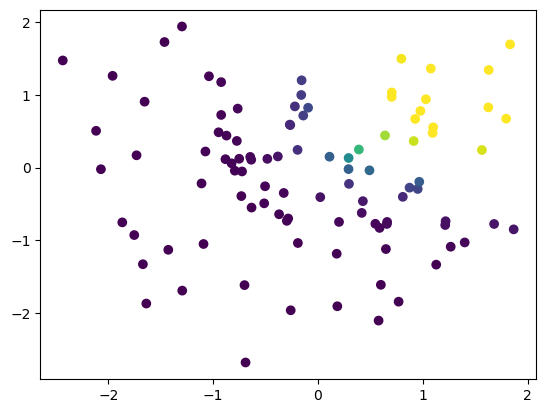

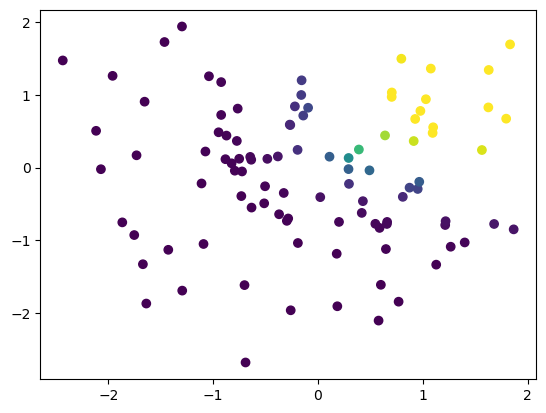

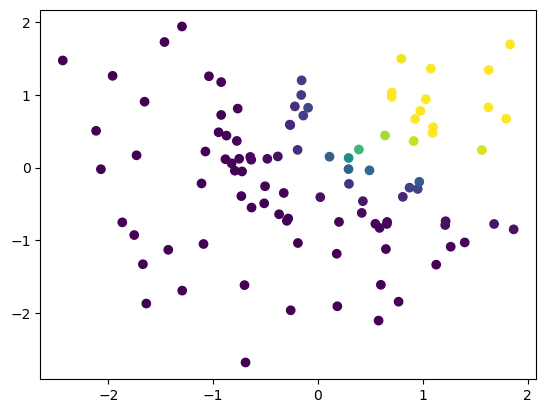

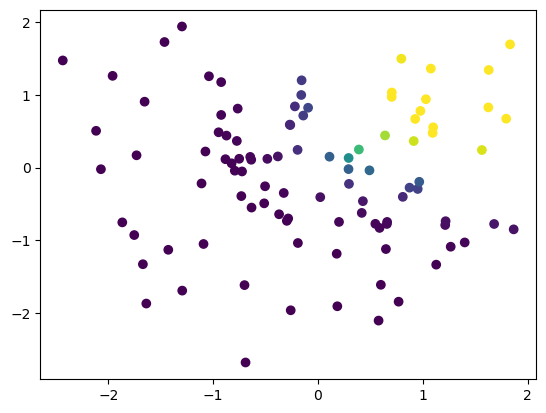

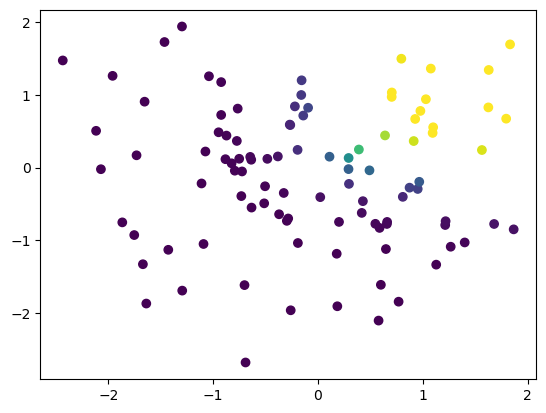

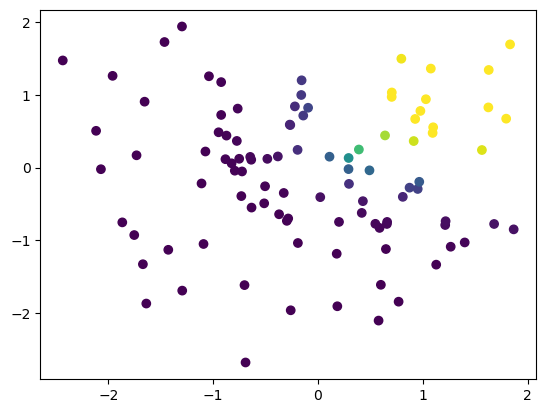

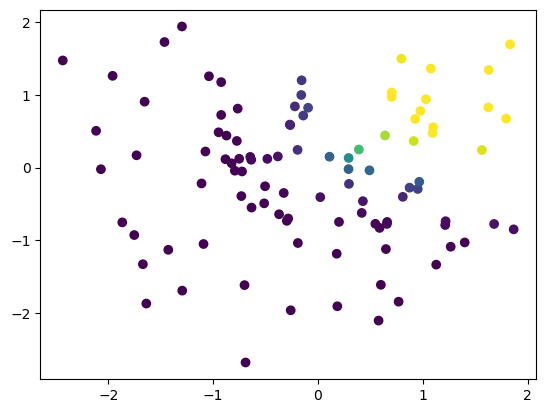

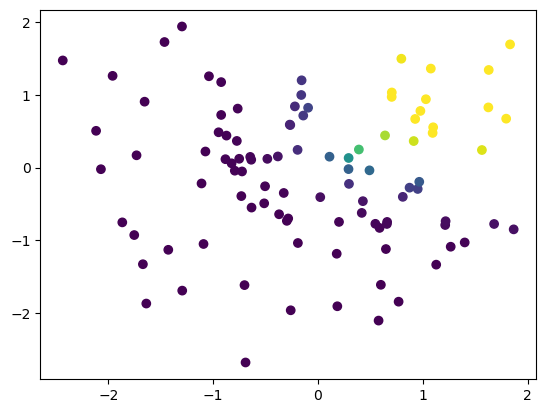

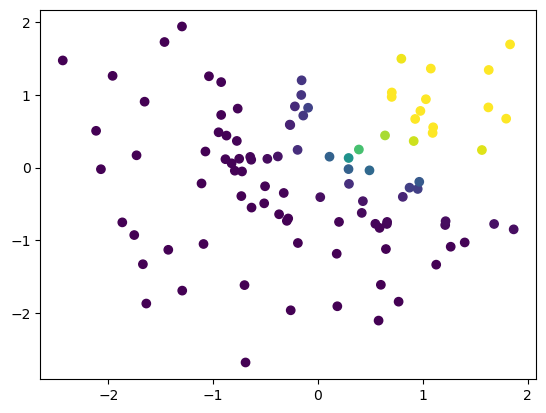

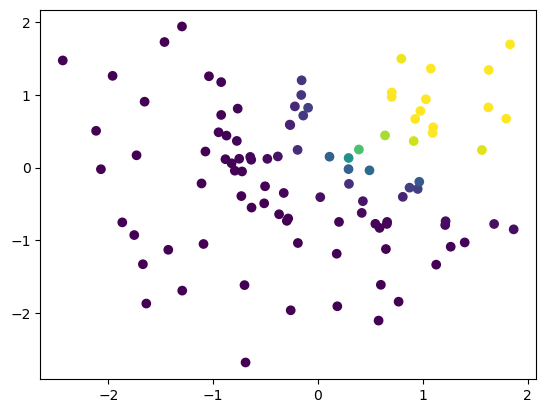

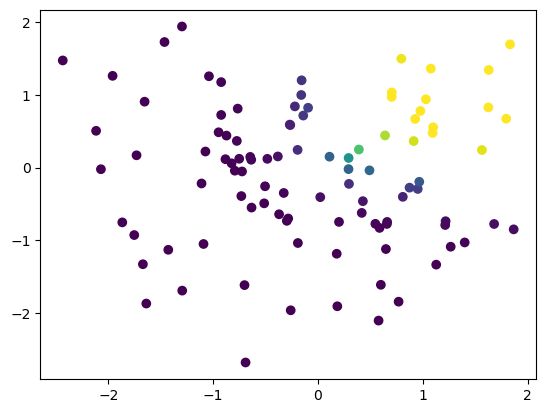

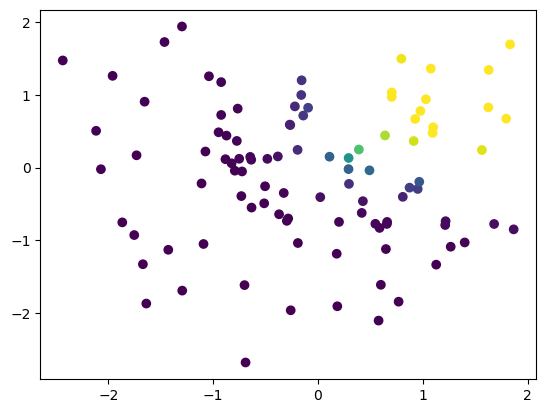

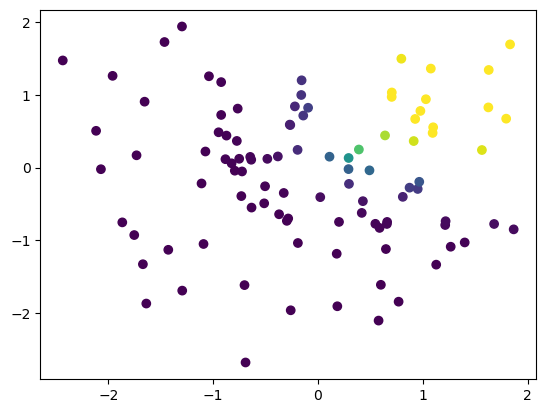

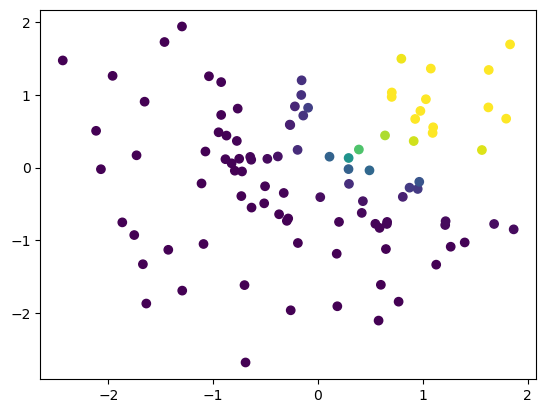

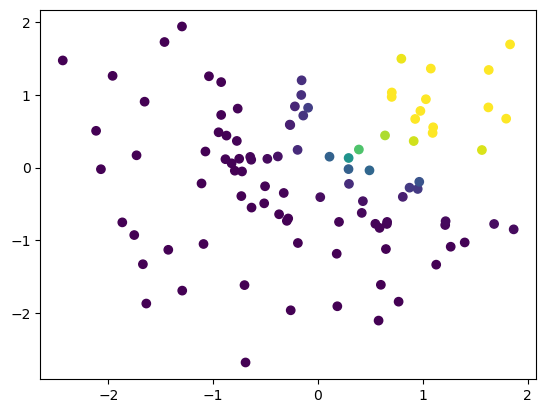

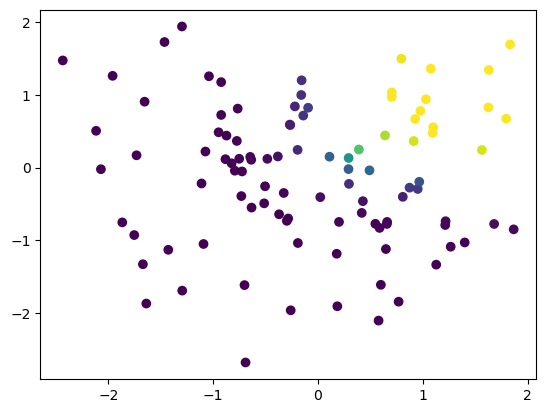

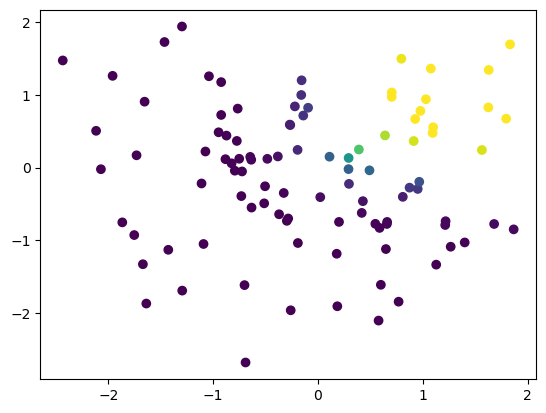

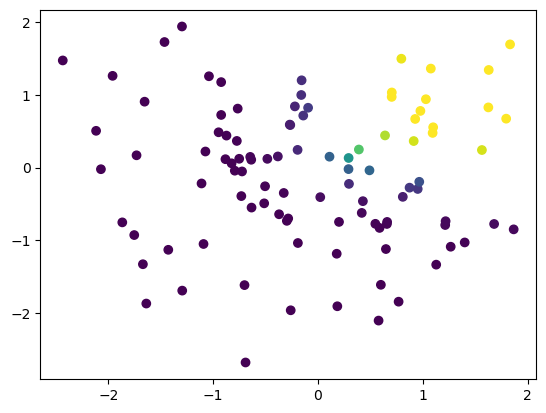

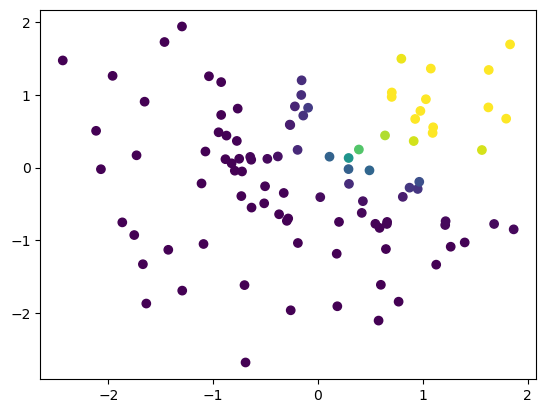

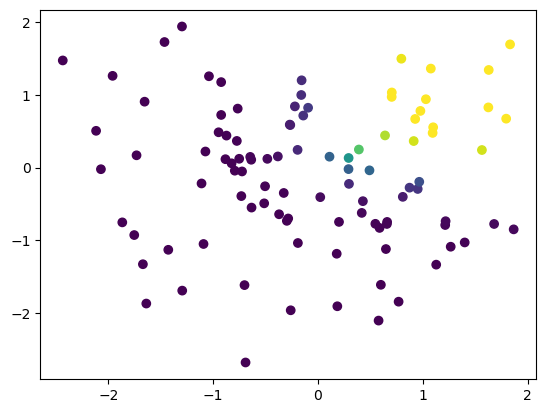

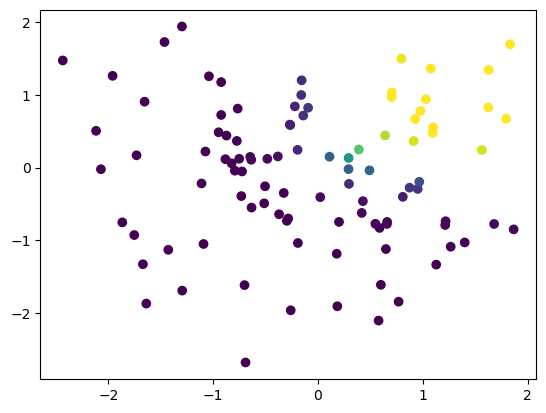

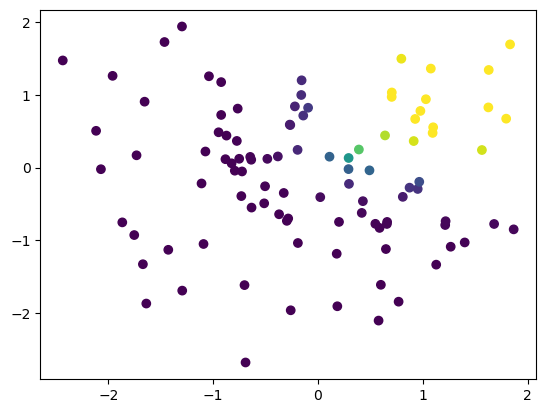

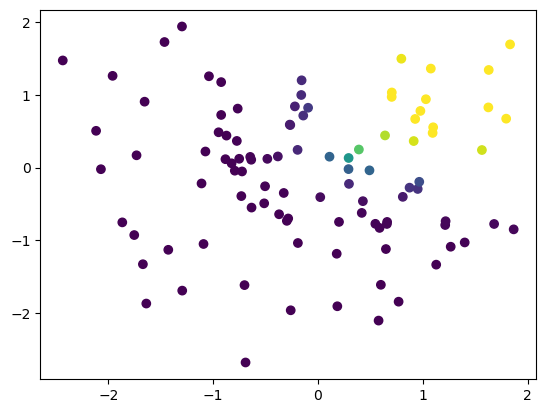

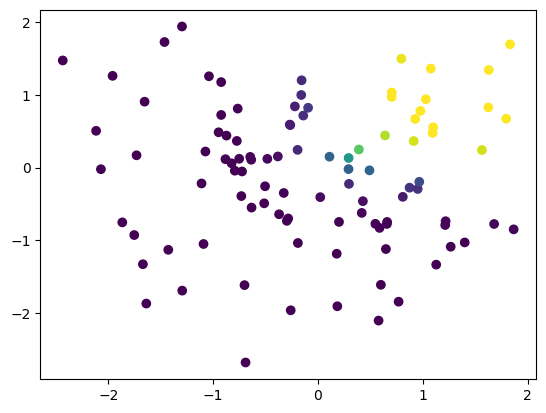

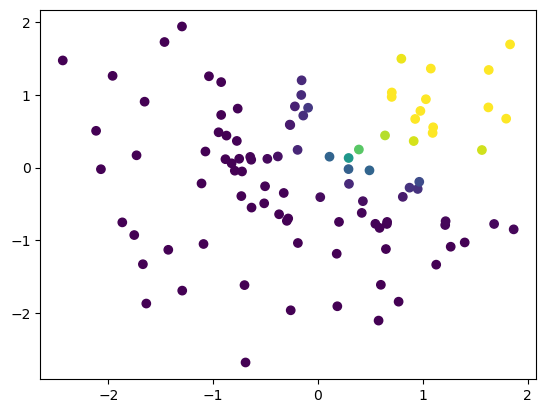

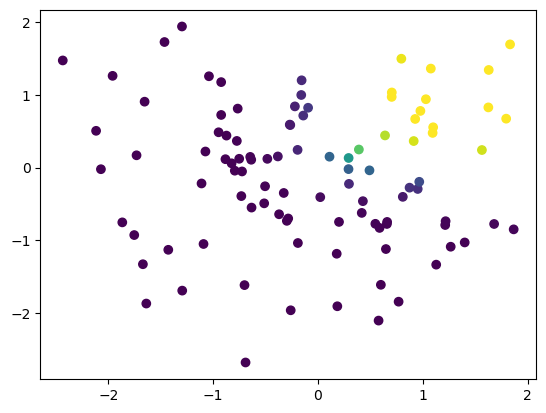

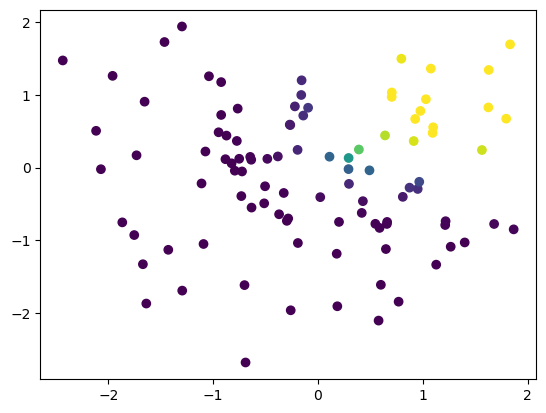

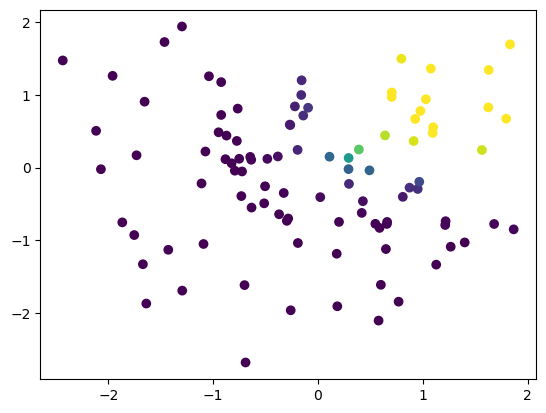

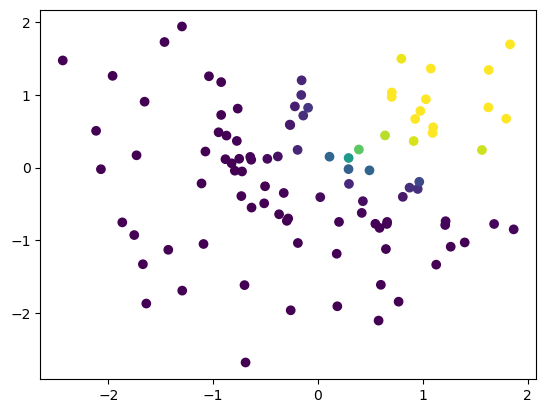

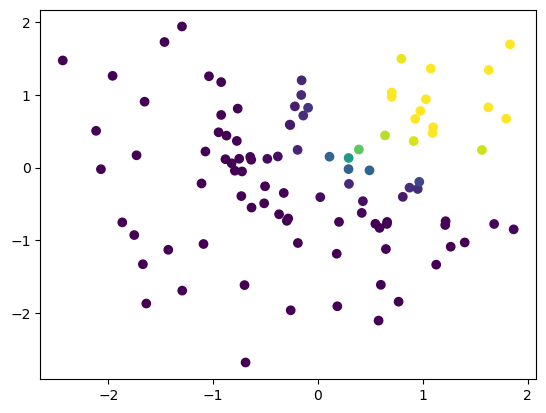

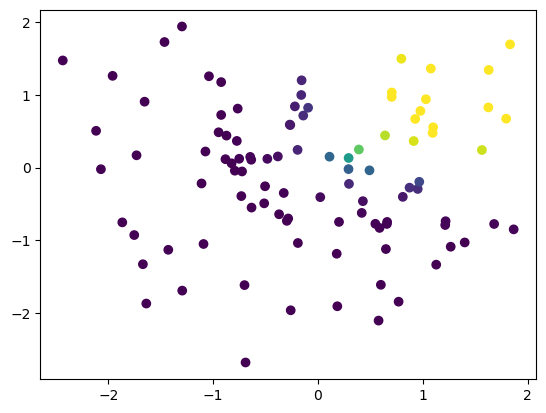

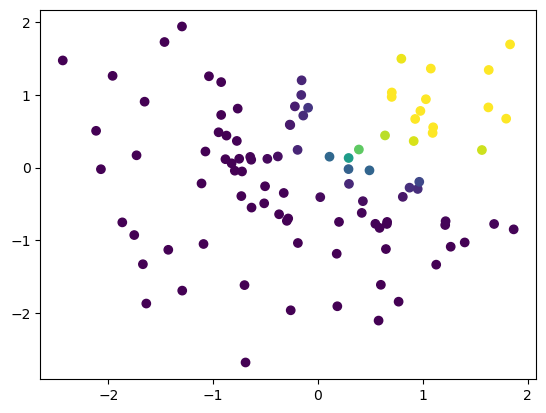

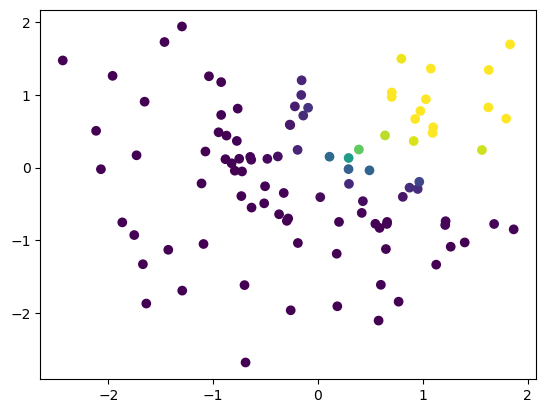

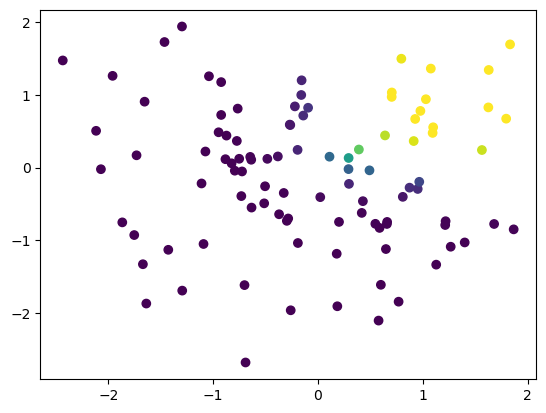

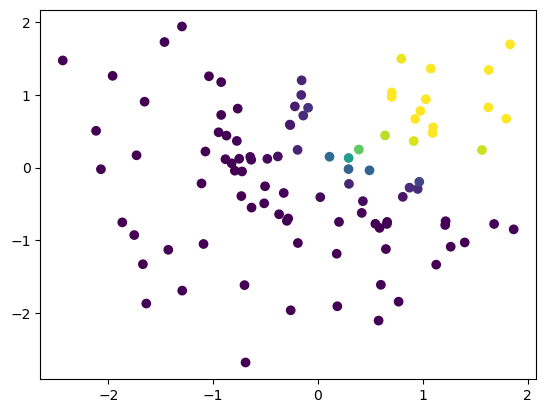

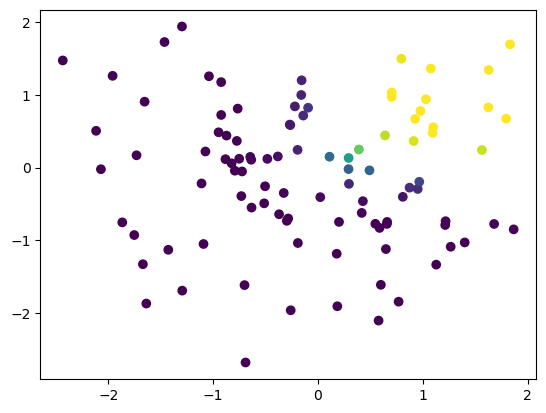

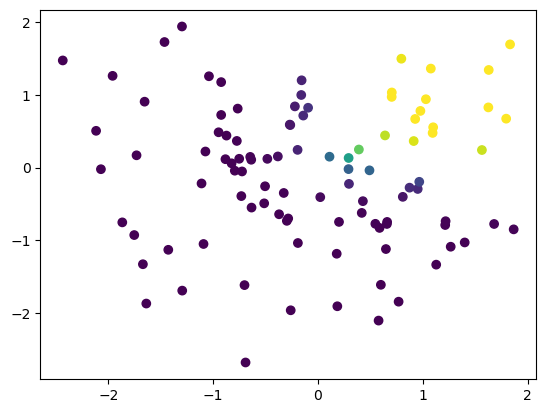

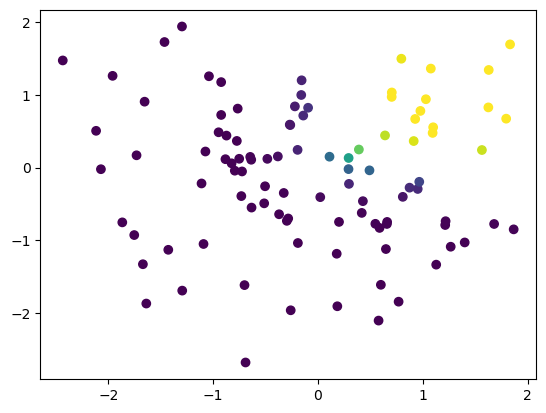

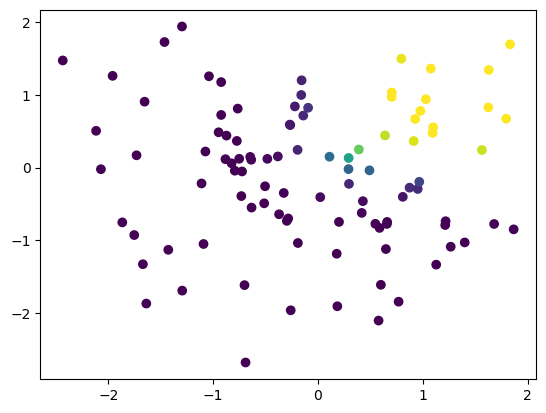

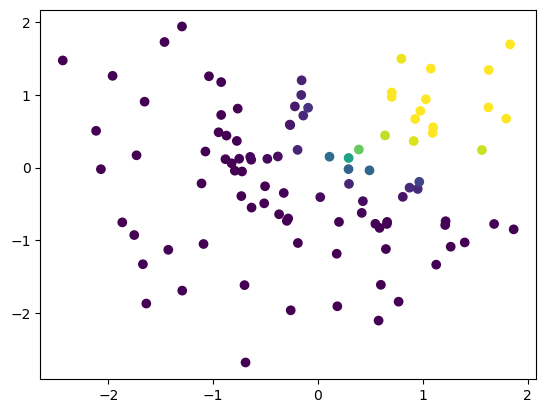

학습 완료 !!!


In [7]:
for epoch in range(1000) : 
    
    # 순전파 단계 
    y_pred = model(x)
    
    # loss 
    loss = criterion(y_pred.squeeze(), y)
    
    # 역전파 
    optimizer.zero_grad() # 옵티마이저의 모든 가중치에 대한 변화 0으로 초기화 => 이전 기울 값이 남아있을 가능성이 있어서 
    loss.backward()       # 손실함수 역잔파 수행 
    optimizer.step()      # 옵티마이저 가중치 업데이트 
    
    if epoch % 10 == 0 :
        plt.clf()
        plt.scatter(x[:,0], x[:,1], c=y_pred.detach().numpy().squeeze())
        plt.show()
        
print("학습 완료 !!!")

In [8]:
### 각 산점도 이미지 저장하신 후에 아래 라이브러리 이용하시면 GIF만들수 있어요 !! 참고 

# import imageio

# # 이미지 프레임들의 리스트
# frames = ['frame1.png', 'frame2.png', 'frame3.png', ...]

# # 이미지 프레임들을 GIF 파일로 저장
# with imageio.get_writer('animation.gif', mode='I', duration=0.2) as writer:
#     for frame in frames:
#         image = imageio.imread(frame)
#         writer.append_data(image)